In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

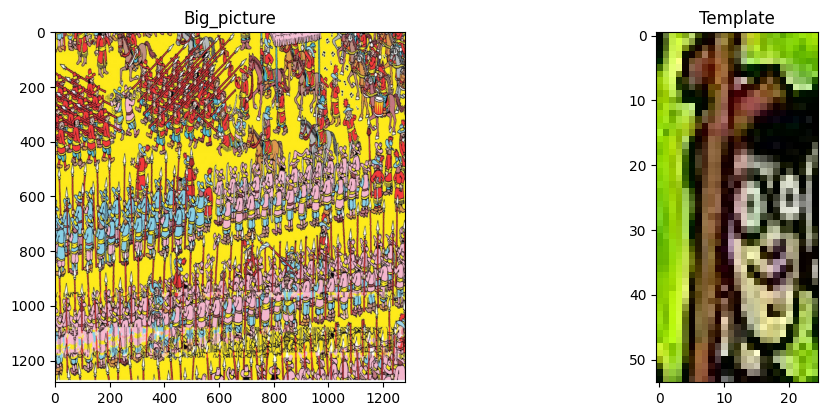

In [31]:
image = cv.imread("/content/drive/MyDrive/DigitalImageProcessing/img.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
template = cv.imread("/content/drive/MyDrive/DigitalImageProcessing/temp.jpg")
template = cv.cvtColor(template, cv.COLOR_BGR2RGB)
# template = cv.flip(template, 1)

gs = plt.GridSpec(2, 2)

plt.figure(figsize=(12, 10))
plt.subplot(gs[0])
plt.title("Big_picture")
plt.imshow(image)
plt.subplot(gs[1])
plt.title("Template")
plt.imshow(template)

In [32]:
#размер шаблона
w, h = template.shape[:-1]
w, h

(54, 25)

In [33]:
#Переводим в черно-белый формат
gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
gray_tmp = cv.cvtColor(template, cv.COLOR_RGB2GRAY)

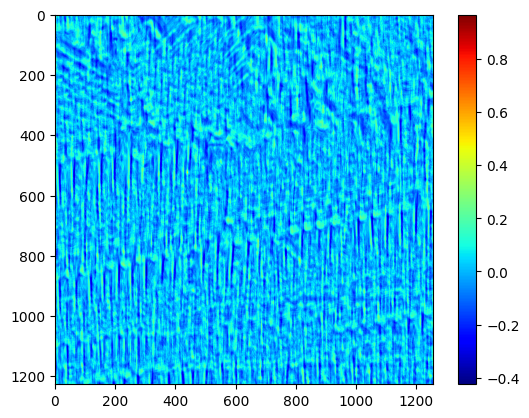

In [34]:
result = cv.matchTemplate(gray_img, gray_tmp, cv.TM_CCOEFF_NORMED)
plt.figure()
plt.imshow(result, cmap='jet')
plt.colorbar()

In [35]:
threshold = 0.9
loc = np.where(result >= threshold)
print(loc)
# Вокруг выделенных максимумов обводим прямоугольники с размерами шаблона
plot_img = image.copy()
for pt in zip(*loc[::-1]):
    cv.rectangle(plot_img, pt,(pt[0] + h, pt[1] + w),(0, 255, 255), 2)

# Отображаем результат на графике
plt.figure(figsize=(15, 10))
plt.title("Result")
plt.imshow(plot_img)

Output hidden; open in https://colab.research.google.com to view.

Результат слева, ниже середины